#**Objectives**

1.   Machine Learning Pipeline
2.   Sample Pipeline Implementation
3.   Implementation - Try on your own




# **Machine Learning Pipeline - Clustering**


1. Loading the dataset
2. Treating and visualizing the dataset
3. Performing Clustering
4. Evaluation Metrics





#**Loading the dataset**

**1.Data Acquisiiton:** Identify and load the dataset that needs to be clustered. It might be stored locally (e.g., CSV, Excel, JSON Files) or might come from a remote database or web APIs.

Example of CSV/Excel Dataset:

![CSV Dataset](https://www.researchgate.net/publication/343438688/figure/fig5/AS:1006697153826827@1617026713718/CSV-file-of-testing-dataset.ppm)

Example of JSON datset:

![JSON Dataset](https://i.sstatic.net/PLE0r.png)


**2.Dataset Structure:** Examine the shape of the data (number of rows and columns), column names, and data types.

**Why it’s Important**

Properly understanding your dataset’s structure and content ensures you’re applying the right transformations and clustering methods later on.


## 2. **Treating and Visualizing the Dataset**

1. **Data Cleaning**:
   - **Handle Missing Values**: Impute or remove rows/columns with excessive missing data.  
   - **Outlier Treatment**: Decide on a strategy for handling outliers (removal, capping, or transformation) depending on the clustering method (some methods are more sensitive to outliers than others).
   - **Categorical Data Encoding**: Convert categorical variables into numeric codes (e.g., via one-hot encoding) so clustering algorithms can process them.
2. **Data Transformation**:  
   - **Feature Scaling**: Scale numeric features (e.g., using standardization or min-max scaling) to ensure that no single feature dominates the distance measurement due to its scale.
   - **Dimensionality Reduction**: (Optional) Use techniques like PCA or t-SNE for data visualization or to reduce high-dimensional data into fewer dimensions before clustering.
3. **Data Visualization**:  
   - **Univariate Plots**: Histograms or box plots to understand distributions.
   - **Multivariate Plots**: Scatter plots, pair plots, or correlation heatmaps to grasp relationships among features.

**Why it’s Important**  
- Data cleaning and preprocessing ensure the integrity and consistency of your dataset.
- Visualization provides insights into data distribution and relationships, guiding the choice of the clustering algorithm or parameter tuning.


## 3. **Performing Clustering**

1. **Algorithm Selection**:
   - **K-Means**: Requires specifying the number of clusters and uses distance-based similarity.
   - **Hierarchical Clustering**: Does not require a predefined number of clusters (although you can cut the dendrogram at a certain level). Useful for smaller datasets.
   - **DBSCAN**: Groups points that are closely packed together; does not need the number of clusters but requires radius and minimum samples parameters.
   - **Gaussian Mixture Models (GMM)**: Probabilistic approach, allows for more flexible cluster shapes than K-Means.

   ![Clustering Method Selection](https://scikit-learn.org/1.5/_images/sphx_glr_plot_cluster_comparison_001.png)
2. **Hyperparameter Tuning**:  
   - **K for K-Means**: Choose the number of clusters by using methods like the **Elbow Method** or the **Silhouette Score**.
   - **Distance or Linkage Methods** (for hierarchical clustering).
   - **Epsilon (ε) and MinPts** (for DBSCAN).
3. **Cluster Assignment**:  
   - After choosing and setting up the clustering algorithm, execute it on your preprocessed dataset to assign cluster labels to each data point.

**Why it’s Important**  
- Different algorithms excel at different cluster structures.  
- Choosing hyperparameters systematically can significantly improve clustering quality.


## 4. **Evaluation Metrics**

1. **Internal Metrics** (No Ground Truth):
   - **Silhouette Score**: Measures how similar an object is to its own cluster compared to other clusters.
   - **Davies-Bouldin Index**: Evaluates the ratio of intra-cluster to inter-cluster distances (lower is better).

   ![Silhouette Score](https://miro.medium.com/v2/resize:fit:960/1*N3Xm52bELqrju_DWLqjyHg.jpeg)
2. **External Metrics** (With Ground Truth):
   - **Rand Index**: Measures agreement between true labels and cluster labels.  
3. **Cluster Interpretability**:
   - **Centroid Inspection** (for K-Means): Analyzing cluster centroids to interpret the “central” features.  
   - **Feature Importance**: (e.g., in hierarchical clustering or GMM) see which features most influence each cluster.

**Why it’s Important**  
- Since clustering is unsupervised, it’s crucial to validate that the discovered clusters have structure and interpretability.  
- Proper evaluation prevents overfitting to random noise and ensures meaningful clusters.
- Different evaluation tecniques can yield different results.
![why](https://substackcdn.com/image/fetch/f_auto,q_auto:good,fl_progressive:steep/https%3A%2F%2Fsubstack-post-media.s3.amazonaws.com%2Fpublic%2Fimages%2F2c9551d8-32f5-462a-99b8-942efd453666_2008x1868.png)

# **Demo: Clustering Titanic Passengers**



The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone on board, resulting in the death of 1502 out of 2224 passengers and crew.

Titanic carried people from different backgrounds—wealthy elites, middle-class travelers, and lower-class emigrants hoping for a new life. But were these groups naturally distinct? Could we use machine learning to identify clusters of passengers based on shared traits like age, ticket class, and fare?

In this demo, we will explore the clustering of Titanic passengers to uncover hidden patterns in the data. By the end, we hope to see if there were naturally occurring groups among the passengers and what characteristics defined them.

## Data Collection

We begin by collecting our dataset. The [Titanic dataset](https://www.kaggle.com/c/titanic/data) contains details about passengers, such as their age, gender, ticket class, and whether they survived. Since the dataset is publicly available, we directly fetch it from GitHub.

In [26]:
import pandas as pd
import numpy as np

# Load the dataset directly from GitHub
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv"
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Here we obtained the information of the dataset. The meaning of some feature titles are:
* `survival` – Survival status (0 = No, 1 = Yes)  
* `pclass` – Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)  
* `sex` – Passenger's gender  
* `age` – Age in years  
* `sibsp` – Number of siblings/spouses aboard the Titanic  
* `parch` – Number of parents/children aboard the Titanic  
* `ticket` – Ticket number  
* `fare` – Passenger fare  
* `cabin` – Cabin number  
* `embarked` – Port of embarkation  
  * `C` = Cherbourg  
  * `Q` = Queenstown  
  * `S` = Southampton  

## Data Understanding

Before diving into analysis, we need to get a sense of how large our dataset is. The shape of the dataset tells us:
- How many passengers (rows) are recorded – This helps us understand the dataset's scale.
- How many features (columns) are available – This gives us an idea of how much information we have for each passenger.

In [27]:
print("Shape:", df.shape)

Shape: (891, 12)


When we print the shape, we get:
- 891 rows → The dataset contains information about 891 passengers who were aboard the Titanic.
- 12 columns → Each passenger has 12 recorded attributes, such as age, ticket class, fare, and survival status.

Next, we want to understand the structure of our dataset.

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We can see here features in the dataset are either **numerical** (e.g. `Age`, `Fare`) or **categorical** (e.g. `Sex`, `Embarked`). We need to later encode those categorical features into numbers before clustering.

We also need to identifies which columns have missing data, helping us decide on data cleaning strategies.

In [29]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Now we know that columns like `Age`, `Cabin`, or `Embarked` have missing values—we need to decide whether to fill or drop them.

The next step is to explore how the numerical data is distributed. This helps us understand the characteristics of the passengers before clustering.

The `describe()` function gives us key statistics for numerical columns, such as:

- Mean (Average `Age`, `Fare`, etc.)
- Standard Deviation (How spread out the values are)
- Minimum and Maximum Values (Helps detect potential outliers)
- Quartiles (25%, 50%, 75%) (Shows data distribution trends)

In [30]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We may also want to create histograms to see the shape of the data for key features:
- Are most passengers young or old?
- Whether some extremely high fares exist (potential **outliers**).

Clusters often form around **common values** (e.g., groups of passengers in similar age ranges or fare categories):
- **Outliers** can affect clustering algorithms (e.g., a handful of very expensive tickets could create misleading clusters).
- If distributions are skewed, we might need transformations (e.g., log scaling) to improve clustering performance.

By summarizing and visualizing our data, we gain intuition about potential clusters before applying any algorithm.

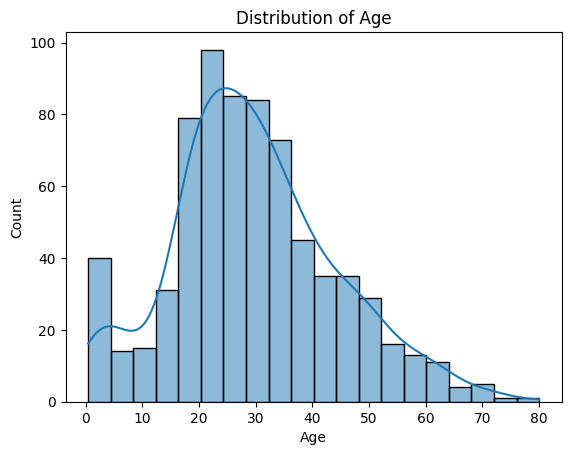

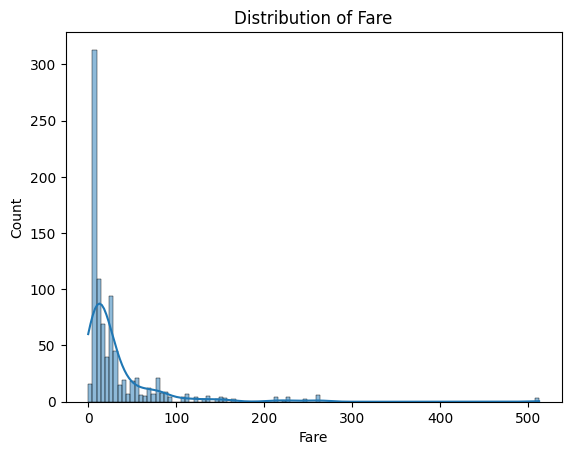

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df, x='Age', kde=True)
plt.title('Distribution of Age')
plt.show()

sns.histplot(data=df, x='Fare', kde=True)
plt.title('Distribution of Fare')
plt.show()

**Age Distribution**
- The distribution of ages shows a right-skewed pattern, meaning more passengers were younger, and fewer were older.
- The **highest** concentration of passengers appears to be between 20-40 years old, with a peak in the early 20s.
- There is a small but notable presence of children (ages 0-10), suggesting family travel.
- Very few passengers were above 60, indicating that elderly individuals were a minority on board.

Since most passengers were young adults, age alone **may not create well-separated clusters**.

**Fare Distribution**
- The fare distribution is **highly skewed** to the right, meaning that most passengers paid low fares, while a small number of passengers paid extremely high prices.
- The majority of fares are below \$50, but there are a few that reach over \$500—likely first-class luxury passengers.
- The spike near \$0 suggests some passengers may have been traveling for free or on heavily discounted tickets.

The extreme variation in fares could cause **distance-based clustering methods** (like K-Means) to be **biased**, where high-fare passengers become their own cluster. A **log transformation** of the fare values might help normalize the distribution, making clustering more effective.

## Data Cleaning for Clustering

Before we apply clustering algorithms, we need to **clean** and **transform** our data. Clustering relies on **numerical** input, so we must ensure our dataset is structured in a way that algorithms can interpret effectively. First, we want to drop unnecessary columns by removing:

- `PassengerId`, `Name`, `Ticket` → These are unique identifiers and don’t contribute to meaningful clustering.
- `Cabin` → Many missing values make it unreliable for clustering.
- `Embarked` → We omit this feature for simplicity.
- `Survived` → Since clustering is unsupervised, we do not use survival labels.
By dropping these columns, we focus only on features relevant for grouping passengers.

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

df_dropped = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked', 'Survived'], axis=1)

Since clustering algorithms do not work with text data, we convert the Sex column into numerical values. This allows the model to treat gender as a distinguishing feature.
- Male → 1
- Female → 0

In [33]:
df_dropped['Sex'] = df_dropped['Sex'].map({'male': 1, 'female': 0})

Some passengers have missing age values. Instead of removing them, we fill missing ages with the **median** age. The **median** is less sensitive to outliers compared to mean (e.g., very old or very young passengers).

In [34]:
df_dropped.fillna({'Age': df_dropped['Age'].median()}, inplace=True)

Because Fare column is highly skewed, meaning some passengers paid significantly more than others. To reduce this effect, we apply a log transformation: `Fare = log(Fare + 1)` (adding 1 to prevents errors for zero fares)

In [35]:
df_dropped['Fare'] = df_dropped['Fare'] + 1
df_dropped['Fare'] = np.log(df_dropped['Fare'])

Clustering methods like **K-Means** use distance-based calculations, so features with larger values (e.g., fare) could dominate smaller ones (e.g., age).

Therefore, we use **StandardScaler()** to normalize all numerical features so that:
- All features have **mean** = 0 and **standard deviation** = 1.
- No single feature overpowers the clustering algorithm.

In [36]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_dropped)

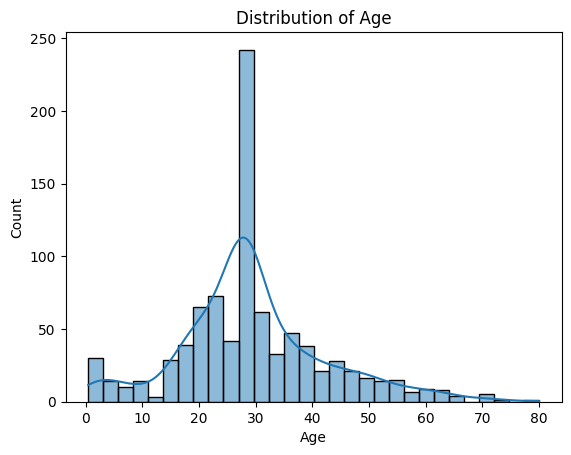

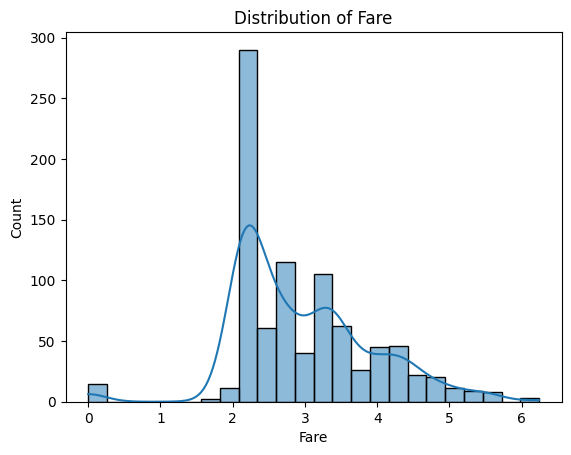

In [37]:
sns.histplot(data=df_dropped, x='Age', kde=True)
plt.title('Distribution of Age')
plt.show()

sns.histplot(data=df_dropped, x='Fare', kde=True)
plt.title('Distribution of Fare')
plt.show()

Now the peak around 30 years old is now much more pronounced because we filled missing `Age` values with the **median** age, which was around 30.
The overall shape remains similar, meaning our imputation did not drastically alter the distribution.

Previously, the `Fare` distribution was extremely skewed, with a long tail of high-value fares. After applying a log transformation, the distribution is now much more balanced and symmetrical. Now, first-class passengers with very expensive tickets won’t dominate clustering just because of large fare values.
This ensures clustering is based on actual similarities in passenger profiles, not just extreme fare differences.

## Clustering Methods

### Data Points Before Clustering

Now that our data is preprocessed and standardized, we apply **Principal Component Analysis** (**PCA**) to reduce the number of dimensions while preserving key information. This allows us to plot data in 2D, making it easier to identify potential clusters.

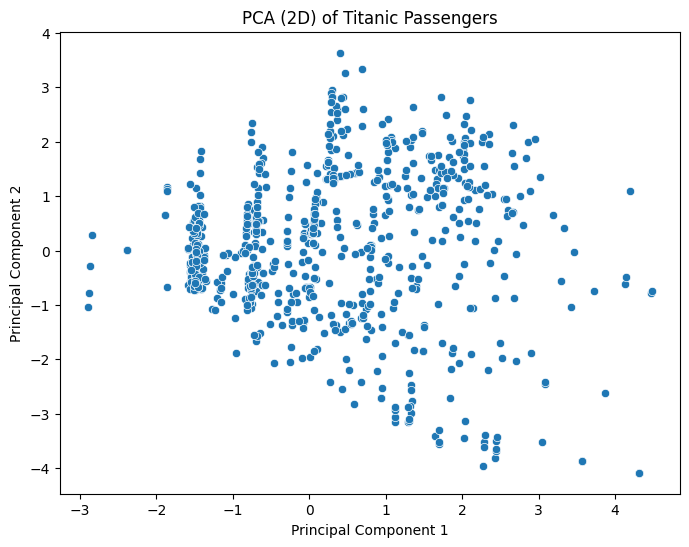

In [38]:
# Perform PCA with 2 components
pca = PCA(n_components=2)
X_pca_2d = pca.fit_transform(X_scaled)

# Plot the PCA results
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_pca_2d[:,0],
    y=X_pca_2d[:,1],
)
plt.title("PCA (2D) of Titanic Passengers")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

Each dot represents a Titanic passenger, positioned according to the 2 principal components.
- Passengers seem **widely distributed**, meaning there is some variability in the dataset.
- There are **dense regions**, suggesting that some groups of passengers share common traits.
- **No clear natural clusters** are immediately visible, which means clustering algorithms will be needed to formally define groups.
- A few points are distant from the main cloud, possibly indicating outliers—passengers whose characteristics are **very different** from the majority.

### K-Means Clustering

Now we are ready to cluster the passengers. We will initially apply **K-Means** clustering to identify groups of passengers based on their characteristics, where we assume **3** clusters (but this can be adjusted based on evaluation metrics). Each passenger is assigned to one of the three clusters, representing distinct groups. We apply PCA again for visulisation.

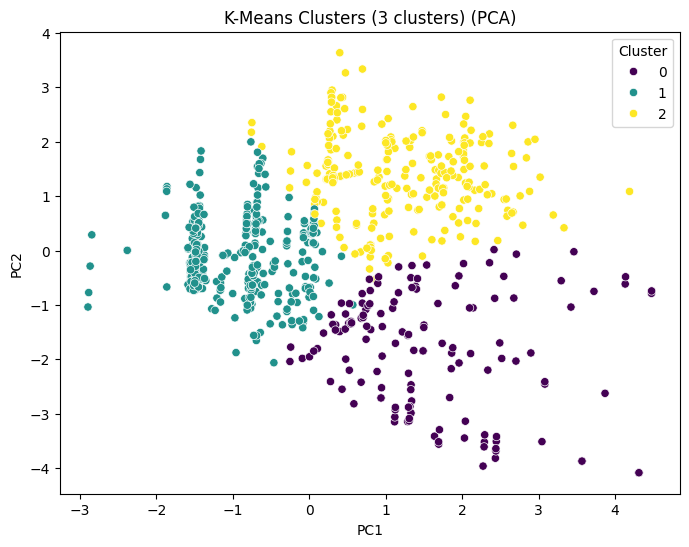

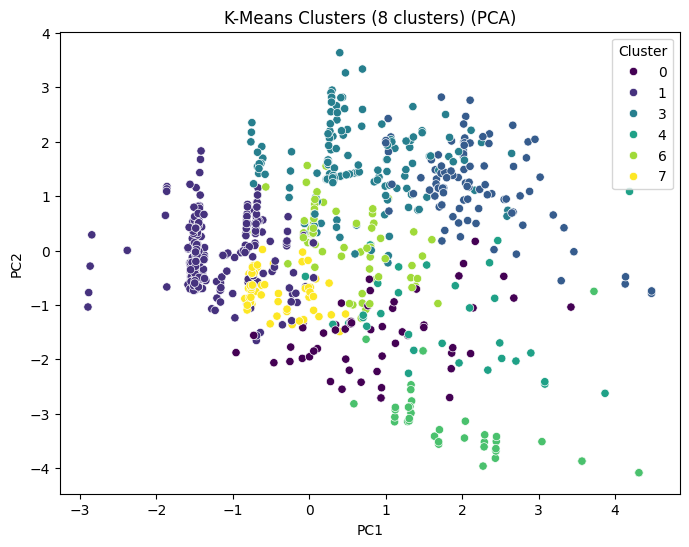

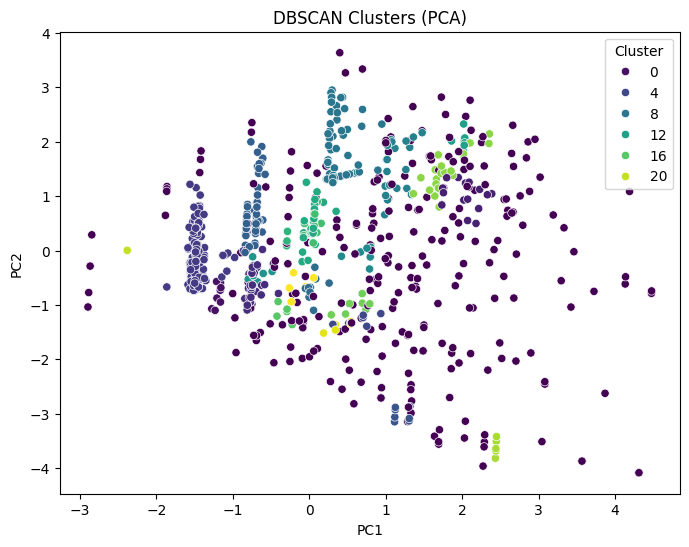

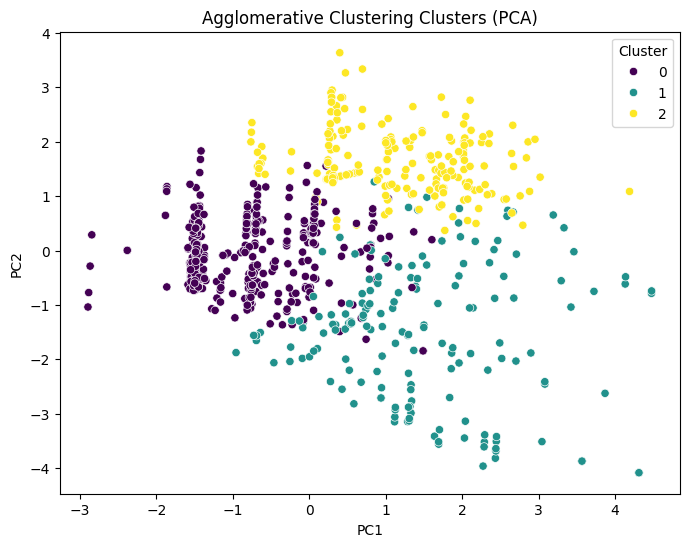

In [40]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

# Suppose we pick 3 clusters for demonstration (feel free to experiment!)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters_kmeans = kmeans.fit_predict(X_scaled)

kmeans2 = KMeans(n_clusters=8, random_state=42)
clusters_kmeans2 = kmeans2.fit_predict(X_scaled)

dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters_dbscan = dbscan.fit_predict(X_scaled)

agg = AgglomerativeClustering(n_clusters=3, linkage='ward')
clusters_agg = agg.fit_predict(X_scaled)

pca_final = PCA(n_components=2)
X_pca = pca_final.fit_transform(X_scaled)

def plot_clusters_2d(X_2d, labels, title='Cluster Visualization'):
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=X_2d[:,0], y=X_2d[:,1], hue=labels, palette='viridis')
    plt.title("K-Means Clusters (Colored by cluster labels)")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.legend(title='Cluster')
    plt.title(title)
    plt.show()

plot_clusters_2d(X_pca, clusters_kmeans, title='K-Means Clusters (3 clusters) (PCA)')
plot_clusters_2d(X_pca, clusters_kmeans2, title='K-Means Clusters (8 clusters) (PCA)')
plot_clusters_2d(X_pca, clusters_dbscan, title='DBSCAN Clusters (PCA)')
plot_clusters_2d(X_pca, clusters_agg, title='Agglomerative Clustering Clusters (PCA)')

The different colors represent the three clusters identified by K-Means.
- The clusters show **noticeable separation**, suggesting K-Means successfully grouped passengers based on shared attributes.
- Some **overlap** exists, meaning certain passengers have characteristics that are similar across clusters.
- PCA helps visualize the clusters, but the actual clustering is based on more dimensions than just these two.

Now that we have identified three clusters, we should assess how well they separate meaningful groups.
- Compute **silhouette scores** – Measures how well-separated the clusters are.
- Try different values of **K** – See if increasing or decreasing clusters improves the results.
- Compare with other clustering methods – **DBSCAN** or **hierarchical clustering** might yield different structures.
- Analyse feature distributions within each cluster – Check whether clusters align with known factors like `ticket class`, `fare`, or `sex`.

### **Try the following**:
- Change the Number of Clusters (K) in K-Means: does increasing K create more meaningful groups, or does it over-segment the data?
- Uncomment the other clustering method to see how the clusters are shaped differently.
- You can also try more clustering method by replacing the scikit-learn API. Some popular method can be found [here](https://scikit-learn.org/dev/api/sklearn.cluster.html).

## Clustering Evaluation

The **Silhouette Score** is a metric used to evaluate the quality of clustering by measuring how well data points are grouped into their assigned clusters while ensuring clusters are well-separated from one another. It provides a score ranging from -1 to 1, where:



- **A higher score** (closer to 1.0) means **better-defined clusters**—passengers in the same group are similar, and different clusters are well-separated.
- **A lower score** (close to 0.0 or negative) means **poor clustering**—some passengers may have been misclassified, and clusters may overlap.

In [41]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

print("Silhouette Score K-means (3 clusters):", silhouette_score(X_scaled, clusters_kmeans))
print("Silhouette Score K-means (8 clusters):", silhouette_score(X_scaled, clusters_kmeans2))
print("Silhouette Score DBSCAN:", silhouette_score(X_scaled, clusters_dbscan))
print("Silhouette Score Agglomerative clustering:", silhouette_score(X_scaled, clusters_agg))

Silhouette Score K-means (3 clusters): 0.3522326665306454
Silhouette Score K-means (8 clusters): 0.3592667189625492
Silhouette Score DBSCAN: 0.15579823152219974
Silhouette Score Agglomerative clustering: 0.33669617739632485


We expanded our analysis to K values ranging from 2 to 255, computing Silhouette Scores for each. This allows us to explore how the clustering quality changes as we increase K.

**Note**: this code might run for a while because we are increasing the K to a very high value.

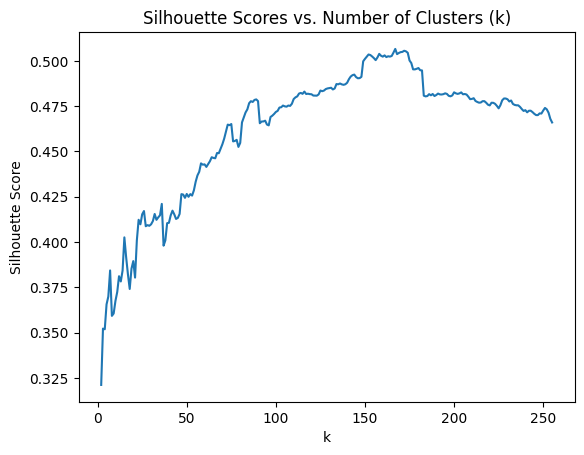

In [42]:
from sklearn.metrics import silhouette_score

s_scores = []
K_range = range(2, 256)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    cluster_labels = km.predict(X_scaled)
    s_scores.append(silhouette_score(X_scaled, cluster_labels))

plt.plot(K_range, s_scores, '-')
plt.title('Silhouette Scores vs. Number of Clusters (k)')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.show()

**Key Observations**:
1. The silhouette score generally increases as K increases
    - The score **improves steadily** until around K = 150, meaning that splitting data into more clusters results in better-defined groups.
    - This is expected because, as K increases, clusters become smaller and tighter, leading to **higher intra-cluster similarity**.

2. Peak around K = 150, then a slight drop
    - The highest silhouette score is reached at around K ~ 150.
    - After this point, the score **slightly drops**, which suggests that further increasing K does not improve cluster quality significantly.

3. High K values may lead to **over-segmentation**
    - Although a higher silhouette score indicates better cluster separation, K = 150 or more is **impractical**.
    - At such high values, clusters **become too small**, possibly **overfitting to noise** in the data.

Despite the increasing trend, we should not blindly pick the highest K. Instead, we need a **balance between silhouette score and interpretability**.

# **Try it on your own**

---

Dataset for you to try:


1.   Dataset 1 - https://www.kaggle.com/datasets/ruchikakumbhar/obesity-prediction
2.   Dataset 2 - https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis
3.   Dataset 3 - https://www.kaggle.com/datasets/yamaerenay/spotify-dataset-1921-2020-160k-tracks

